## S3:
- infinite scaling
- used for many application
- commonly used AWS service

### AWS S3 use case:
- Back up and storage
- Disaster recovery
- Archive
- Application hosting
- media files
- static websites
- big data analytics


### S3 Storage:
- stores files i.e objects into buckets (directory)
- buckets globally have unique name
- its a global s3 service
- buckets are defined ar regional level
- follow naming convention
    - no uppercase, no underscore
    - 3 to 63 characters long
    - not an IP
    - must start with lowercase or number
    - must not prefix "xn--"
    - must not suffix "-s3alias"
- S3 buckets are not publicly access by default

S3 Objects:
- Objects have a key
- Objects with same name will be replaced
- key is the full path of the file (highlighted in blue in picture below)
- key = prefix (directories and not include the bucket name) + object name
- object values are content of the body
    - max object size is 5TB (5000 GB)
    - if uploading more than 5 GB, its multi-part upload
- metadata
    - list of key-value pairs (system or user metadata)
- tags
    - unicode key-value pairs (upto 10 allowed)
- version ID


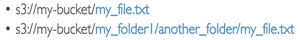

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('key.jpeg')
new_image = img.resize((300, 40))
display(new_image)

### Create a bucket in S3:
- Go to S3 console from AWS service
- Click on "Create bucket"
- Based on the region we currently present it choose the bucket region
- bucket type
    - general purpose
    - Directory
- bucket name
- copy settings from existing bucket
    - choose bucket
- object ownership
    - ACLs disabled (all objects buckets owned by the current AWS account)
    - ACLs enabled (objects in this bucket can be owned by other AWS account)
- object ownership
- Block public access settings to this bucket
    - block public access and grant through new access control list (ACL)
    - block public access and grant through any access control list (ACL)
    - block public access and grant through new bucket policy or access point policies
    - block public access and also block cross AWS account access
- bucket versioning
- tags
- encryption
    - server side encryption with AWS S3 managed keys
    - server side encryption with AWS S3 managed keys
    - dual layer server side encryption with AWS S3 managed keys
- bucket key
    - enable
    - disable
- Done

### Upload objects into the bucket:
- Go inside the bucket for which files need to be uploaded
- See the tabs available inside the bucket
    - properties
    - permissions
    - objects
    - metrics
    - management
    - access points
- click on upload option
- choose the file to upload 
- other option,
    - create folder
    - actions
    - delete
- Done

### Check the upload object in the bucket
- Go to objects tab in s3 bucket
- click the object
    - properties
        - S3 URI
        - ARN
        - Object URL (if trying to open url wont work with access denied)
        - Region 
    - permission
    - version
- other options are,
    - copy S3 URI
    - download
    - open (S3 presigned URL)
    - object actions


### Amazon S3 security:
- User Based
    - IAM policies - API calls for a user
- Resource Based
    - Bucket Policies - allows cross account
    - Object ACL (Access Control List) - finer grain
    - Bucket ACL (Access Control List) - less common

Note:
- IAM principal can access S3 object
    - IAM user permissions are "Allow" or resource policy "Allow"
    - no explicit deny
- Encrypt object in S3 using encryption key


### S3 Bucket Policy:
- Same as IAM Policies
- Encryption of objects during upload
- Public access
- Cross Account access

### using Bucket Policy:

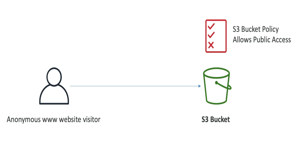

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('bucketpolicy.jpeg')
new_image = img.resize((300, 150))
display(new_image)

### using IAM Policy:

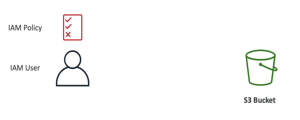

In [15]:
from PIL import Image 
from IPython.display import display

img = Image.open('iampolicy.jpeg')
new_image = img.resize((300, 120))
display(new_image)

### EC2 using IAM Roles & Policy:

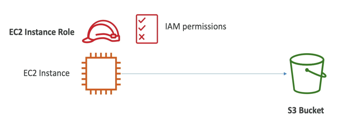

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('roles.jpeg')
new_image = img.resize((350, 140))
display(new_image)

### Cross AWS account Access:

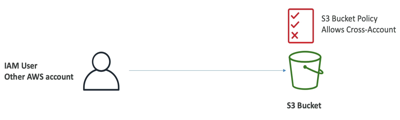

In [9]:
from PIL import Image 
from IPython.display import display

img = Image.open('crossaccount.jpeg')
new_image = img.resize((400, 120))
display(new_image)

### Add bucket policy to provide public access to buckets:
- Go inside the bucket and select the permissions tab
- Disable "Block public access"
- Add bucket policy
    - bucket policy generator
- Done
- Now open the bucket URL of the object


### S3 Static Web Hosting:
- See below the bucket url format depending on region
- If 403 Forbidden, then allow S3 reads permission on bucket policy

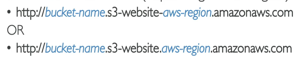

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('bucketurl.jpeg')
new_image = img.resize((300, 60))
display(new_image)

### Setup Static website:
- Go inside the bucket
- Go to properties tab
    - scroll down to static website hosting 
        - Edit
        - Static website hosting
            - enable
            - disable
        - Hosting type
            - static website
            - redirect request for an object (redirect requests to another bucket)
        - Index document
            - index.html
        - Error document
            - error.html
        - Redirection rules
- Done
- Upload the index.html and error.html files
- Go to the static website hosting option (properties tab)
    - Click the url shown

### S3 Versioning:
- By enabling S3 versioning, when an object is uploaded, it creates version for it
- Each changes in the object will generate a versioning "id" for the object
- It is at the bucket level
- accidental deletes can be restored by versioning
- rollback

Note:
- Any files uploaded before enabling versioning will be defined as "null" version value.
- Suspending versioning will not delete the previous versions


### Setup S3 versioning:
- Go inside the bucket
- Go to properties tab
    - Edit
    - Bucket versioning
        - suspend
        - enable
    - MFA
- reuploaded the same index.html file with minor changes
- Now we can see the version id of the new index.html file by toggling "show versions"


Rollback:
- If we want to rollback to previous version
- By enabling versioning and also the toggle to show the version ID 
    - Select the object with the version to delete
    - Delete

### Delete an object as delete marker:
- Inside the bucket
- bucket versioning enabled
- One of the object (image file) used by the index.html object is deleted 
- Now when we enable the toggle for "show versions"
- We can see the deleted object as a delete marker
- Now if we load the static website hosting URL in the browser, the image will be broken
- We can restore the deleted object by deleting the object defined as deleted marker in the bucket under "type"

### S3 Replication:
- CRR (Cross Region Replication) & SRR (Same Region Replication)
- Enable versioning in both regions (source and destination buckets)
- across different AWS account
- asynchronous copy
- IAM permissions

Note:
- After replication enabled, only new objects are replicated
- Can replicate existing object using S3 Batch replication
    - existing objects without replication and objects failed during replication
- Can also replicate delete markers from source to target
- Deletion with version ID are not replicated
- No chaining operation, 
    - Bucket 1 replication to Bucket 2
    - Bucket 2 replication to Bucket 3
    - Then, objects in Bucket 1 is not replicated to Bucket 3. Not transitive

Note:
- The version ID of an object with replication for both source and destination bucket are the same
- If we delete the only single available version of the object, it will create delete marker
- If we delete the one of the several available versions of the object, it will permanently delete the object and not create delete marker

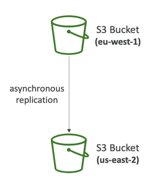

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('replication.jpeg')
new_image = img.resize((150, 180))
display(new_image)

### Setup bucket objects replication:
- Create a bucket-1 in one region
- Create another bucket-2 in another region
- Enable versioning for both buckets while creation
- Go inside bucket-1
    - Go to management tab
        - Replication rules
            - name
            - status
                - enabled
                - disabled
            - source bucket
                - bucket name
                - bucket region
                - rule scope
                    - all objects 
                    - with filters
                    - filter type
                        - prefix
            - destination bucket
                - bucket in same account
                - bucket in different account
            - IAM roles
                - create
            - Encryption
            - Destination Storage class
            - Additional Replication options
                - RTC - Replication Time Control (replicates 99% objects within 15 minutes)
                - Replication metrics and notification
                - Delete Marker Replication
                    - Delete markers created by lifecycle are not replicated
                    - Delete markers created by S3 delete option is replicated
                - Replica Modification Sync


### Storage Classes S3:
- Standard General Purpose
- Standard - Infrequent Access
- One Zone - Infrequent Access
- Glacier Instant Retrieval
- Glacier Flexible Retrieval
- Glacier Deep Archive
- Intelligent Tiering

Note:
- can move between storage classes manually or using S3 Lifecycle configuration

### S3 Durability & Availability:
- Durability:
    - data loss
    - 99.999999%
    - same for all storage classes

- Availability:
    - service available after failure
    - varies for different storage class

### S3 General Purpose:
- Used for frequently accessed data
- 99.99999% availability
- low latency and high throughput
- can sustain 2 concurrent facility failures

Usage:
- analytics, gaming, mobile apps, content distribution, etc

### Infrequent Access:
- for data less frequently accessed, but requires rapid access
- lower cost than S3 standard (general purpose)

Amazon S3 Standard Infrequent Access:
- 99.9% availability
- usage: disaster recovery, backups

Amazon S3 One Zone Infrequent Access:
- High durability in single AZ, but data lost when AZ is destroyed
- 99.5% availability
- usage: secondary backup copies of premises data

### Glacier Storage Classes:
- Low cost object storage for archiving or backup
- Pricing: price for storage + object retrieval cost

Glacier Instant Retrieval:
- milliseconds retrieval, great for data accessed for every quarter
- minimum storage duration of 90 days

Glacier Flexible Retrieval:
- expedited (1-5 mins), standard (3-5 hours), Bulk (5-12 hours) - free
- minimum storage duration of 90 days

Glacier Deep Archive: (for long term)
- standard (12 hours), bulk (48 hours)
- minimum storage duration of 180 days

Intelligent Tiering:
- Small monthly monitoring and auto-tiering fee
- Move objects between different access tiers
- No retrieval charges

Types of tiers:
- frequent access tier - automatic (default)
- infrequent access tier - automatic (objects not accessed for 30 days)
- archive instant access tier - automatic (objects not accessed for 90 days)
- archive access tier - optional (objects not accessed for 90 days to 700+ days)
- deep archive access tier - optional (objects not accessed for 180 days to 700+ days)

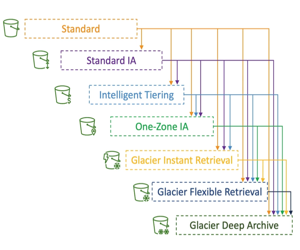

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('storageclasses2.jpeg')
new_image = img.resize((300, 250))
display(new_image)

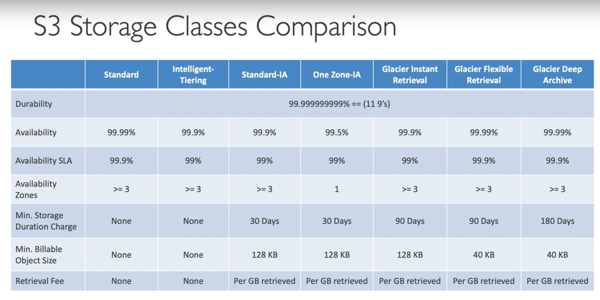

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('storageclasses.jpeg')
new_image = img.resize((600, 300))
display(new_image)

### Setup Storage classes for S3 bucket:
- Create a bucket in S3 console
- Open the bucket
- upload objects (files)
- while uploading, go to properties option below and see the storage class for objects 

Note:
- We can also choose the storage class for already created objects by going to properties tab
- scroll down to storage class option and edit

### To automate objects moving between buckets using lifecycle rules:
- Go Management tab inside the S3 bucket
- Go to Lifecycle rules configuration
- Create
    - Life cycle rule name
    - rule scope
        - to all objects
        - use filter to choose selected objects
        - filter type
            - prefix
    - life cycle rule actions
    - transition from one storage class to another
        - retention days
        - add more transitions
    - create rule


### Amazon S3 Lifecycle Rules:
- Transition Rules
    - Move objects between storage classes based on duration
- Expiration Rules
    - Delete object based on duration
        - delete old versions when versioning enabled
        - delete incomplete multi part upload

Note:
- Rules can be created for specific prefixes
- Rules can be created for various tags

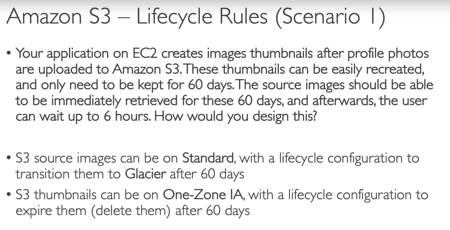

In [121]:
from PIL import Image 
from IPython.display import display

img = Image.open('lifecyclescenario.jpeg')
new_image = img.resize((450, 230))
display(new_image)

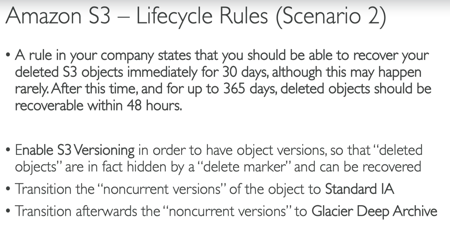

In [120]:
from PIL import Image 
from IPython.display import display

img = Image.open('lifecyclescenario2.jpeg')
new_image = img.resize((450, 230))
display(new_image)

### Lifecycle Rules with S3 analytics:
- helps in transitioning objects between storage classes
- takes 24-48 hours for seeing the data analysis
- recommended for Standard and Standard IA
    - not for Glaciers and One Zone IA
- report is updated daily

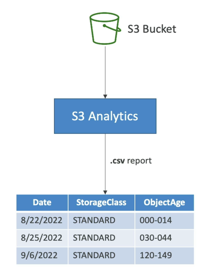

In [118]:
from PIL import Image 
from IPython.display import display

img = Image.open('s3analytics.jpeg')
new_image = img.resize((200, 270))
display(new_image)

### Lifecycle rules with actions:
- Go to S3 console and choose the created bucket
- Go to management tab inside the bucket
- Create Lifecycle Rules for transitioning between storage classes
    - Scroll down to Lifecycle rule actions
    

### S3 Event Notifications:
- S3 Object created, S3 object deleted, S3 object restore, S3 object replication, etc
- event notification filtering (using text prefixes or suffixes)
- needs IAM permission -> Resource Access Policies (not IAM Roles)
- Lambda functions, SNS, SQS, EventBridge (extends to 18 AWS services)

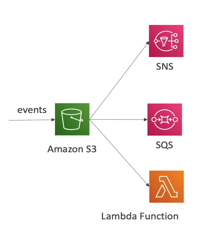

In [108]:
from PIL import Image 
from IPython.display import display

img = Image.open('events.jpeg')
new_image = img.resize((200, 240))
display(new_image)

Note:
- Resource Access Policies (not IAM Roles)

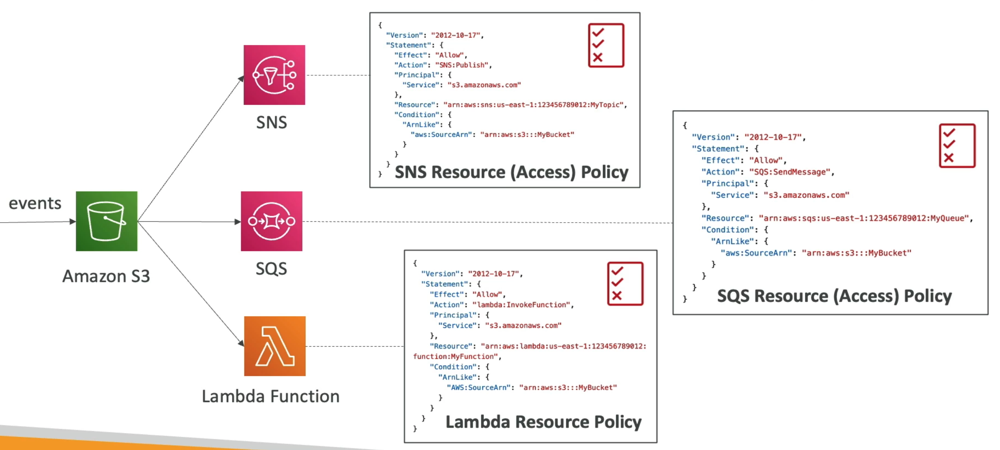

In [106]:
from PIL import Image 
from IPython.display import display

img = Image.open('resourcepolicy.jpeg')
new_image = img.resize((1000, 450))
display(new_image)

### EventBridge:
- advanced filtering options using JSON rules (metadata,size,name, etc)
- multiple destinations: step functions, kinesis firehose/streams
- archive, replay events, reliable delivery (eventbridge capabilities)

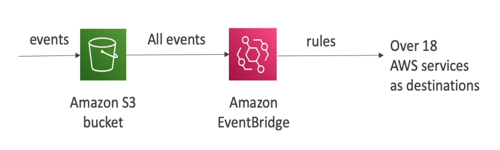

In [37]:
from PIL import Image 
from IPython.display import display

img = Image.open('eventbridge.jpeg')
new_image = img.resize((500, 150))
display(new_image)

### Setup S3 Event bridge Notifications:
- Go inside the bucket
- Go to properties
    - Scroll down to Event Notifications
        - create notification
            - name
            - prefix
            - suffix
            - event types
                - object creation
                    - put
                    - post
                    - copy
                    - multi part upload
                - object removal
                - object restore
                - object ACL
                - object tagging
                - object replication
                - reduced redundancy storage
                - life cycle
                - intelligent tiering
            - destination
                - SQS
                    - SQS queue name
                        - Create a SQS queue and go to Access Policy tab inside created queue to give permissions
                    - SQS ARN
                - Lambda
                - SNS
        - Amazon Event bridge
            - Edit
                - set it to ON
        - create 


### To check if any messages in SQS queue
- In SQS console, inside the queue
- Click on "Send/Receive messages" button
- click on poll for messages

### S3 Performance:
- Baseline:
    - ultra low latency
    - scales to high request rates
    - 3500 put/copy/delete/post requests per second per prefix of a bucket
    - 5500 get/head requests per second per prefix of a bucket
    - no limits to the number of prefixes in a bucket

- Multi-part uploads:
    - recommended for files > 100mb
    - must for files > 5GB
    - parallelize uploads

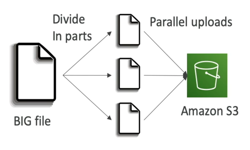

In [40]:
from PIL import Image 
from IPython.display import display

img = Image.open('multipart.jpeg')
new_image = img.resize((250, 150))
display(new_image)

- S3 Transfer Acceleration:
    - increase transfer speed by transferring file to AWS edge location which will forward the data into S3 bucket in the target region
    - compatible with multi-part upload

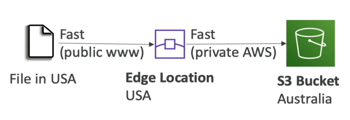

In [42]:
from PIL import Image 
from IPython.display import display

img = Image.open('transferacceleration.jpeg')
new_image = img.resize((350, 120))
display(new_image)

- Byte range fetches:
    - parallelize GETs by requesting specific byte range objects

Note:
- speed up downloads 
- to retrieve partial file information

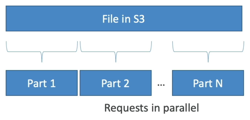

In [45]:
from PIL import Image 
from IPython.display import display

img = Image.open('byteranges.jpeg')
new_image = img.resize((250, 120))
display(new_image)

### S3 Object Tags and Metadata:

S3 User-defined object metadata:
- when uploading object, we can assign metadata
- name-value (key-value) pairs 
- user-defined metadata must begin with "x-amz-meta-"
- stores user-defined metadata keys in lowercase
- metadata can be retrieved when retrieving an object
- useful in event bridge rules

Note:
- Below picture shows,
    - Content-Length & Content Type are provided by AWS
    - x-amz-meta-origin is provided by the user

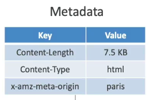

In [58]:
from PIL import Image 
from IPython.display import display

img = Image.open('user.jpeg')
new_image = img.resize((150, 100))
display(new_image)

S3 Object Tags:
- Key-value pairs for objects
- useful for finer grain permissions
- useful for analytics (S3 analytics)

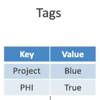

In [57]:
from PIL import Image 
from IPython.display import display

img = Image.open('tags.jpeg')
new_image = img.resize((100, 100))
display(new_image)

Note:
- cannot search or filter objects based on metadata or tags
- to search, build external DB (Dynamo DB) as search index

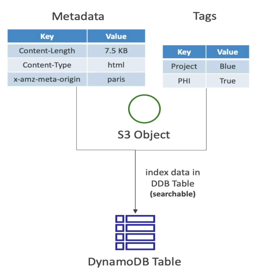

In [64]:
from PIL import Image 
from IPython.display import display

img = Image.open('search.jpeg')
new_image = img.resize((260, 280))
display(new_image)

### Object Encryption:
- Server-Side Encryption
    - AWS Managed Keys (SSE)
    - KMS keys stored in AWS KMS (Key Management Service) (SSE-KMS)
    - Customer provided keys (SSE-C)
- Client-Side Encryption

#### Server-Side Encryption - AWS Managed Key (SSE):
- all owned, managed and handled by AWS 
- encryption type: AES-256
- must set header -> "x-amz-server-side-encryption":"AES26"
- enabled default for new buckets

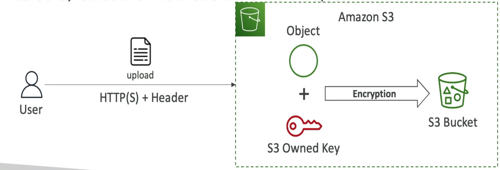

In [66]:
from PIL import Image 
from IPython.display import display

img = Image.open('sse.jpeg')
new_image = img.resize((500, 170))
display(new_image)

### Setup encryption for S3 objects in bucket - SSE:
- Go to S3 console and create a bucket
- while creating bucket choose the object encryption option to SSE (default)
- create
- upload object 
- select and click the object
- scroll down to server-side encryption settings
    - Click Edit
    - if versioning is enabled, then the changes to encryption type will create new version of the objects in the bucket

#### Server-Side Encryption - Key Management Service (KMS-SSE):
- only managed and handled by AWS not owned
- user control + audit key usage in cloud trail
- must set header -> "x-amz-server-side-encryption":"aws:kms"

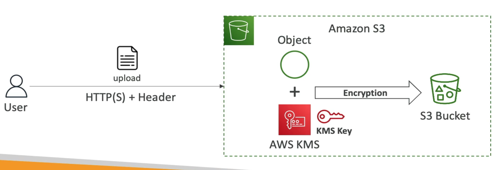

In [67]:
from PIL import Image 
from IPython.display import display

img = Image.open('kms.jpeg')
new_image = img.resize((500, 170))
display(new_image)

### Limitations of KMS:
- upload & download is impacted by KMS limits
    - GenerateDataKey KMS API (upload)
    - Decrypt KMS API (download)
    - count towards KMS quota per second (5500, 10000, 30000 requests/second based on regions)
    - can request increase in limit using Service quota console
- If we have a high throughput S3 bucket using KMS encryption will lead into throttling issues

### Setup encryption for S3 objects in bucket - SSE-KMS:
- Go to S3 console and create a bucket
- while creating bucket choose the object encryption option to SSE-KMS (default)
    - Choose the default available KMS key (no cost)
    - Create own KMS keys (cost involved)
    - Bucket Key is enabled by default otherwise there will be more cost because of excessive API calls to AWS KMS 
- create
- upload object 
- select and click the object
- scroll down to server-side encryption settings
    - Click Edit
    - if versioning is enabled, then the changes to encryption type will create new version of the objects in the bucket

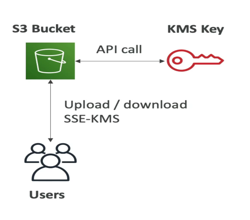

In [72]:
from PIL import Image 
from IPython.display import display

img = Image.open('limitation.jpeg')
new_image = img.resize((250, 220))
display(new_image)

#### Server-Side Encryption - customer provided keys (SSE-C):
- Keys are fully managed outside of AWS
- Amazon S3 do not store the encrypted key which was provided
- HTTPS must be used
- Encryption key to be provided in HTTP header every time a request is made

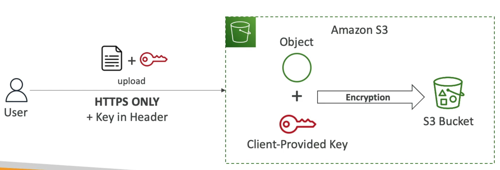

In [73]:
from PIL import Image 
from IPython.display import display

img = Image.open('ssec.jpeg')
new_image = img.resize((500, 170))
display(new_image)

### Setup encryption for S3 objects in bucket - SSE-C:
- For SSE-C, its not possible in console instead we need to use AWS CLI.

#### Server-Side Encryption - Dual layer KMS (DSSE-KMS):
- two layers of encryption managed and stored by KMS
- each layer of encryption uses a different implementation of 256-bit Advanced Encryption Standard with Galois Counter Mode (AES-GCM) algorithm.
- It is developed for high security for government confidential data i.e. US Department of Defense (DoD) customers
- can also enforce DSSE-KMS using IAM and bucket policies.

### Setup encryption for S3 objects in bucket - DSSE-KMS:
- Go to S3 console and create a bucket
- while creating bucket choose the object encryption option to DSSE-KMS (default)
    - Choose the default available KMS key (no cost)
    - Create own KMS keys (cost involved)
    - Enter AWS KMS Key ARN
    - Bucket Key is enabled by default otherwise there will be more cost because of excessive API calls to AWS KMS 
- create
- upload object 
    - server-side encryption
        - do not specify encryption key
        - specify encryption key
            - if bucket policy requires objects to be encrypted, encryption key needs to be specified otherwise uploads will fail 
- select and click the object
- scroll down to server-side encryption settings
    - Click Edit
    - if versioning is enabled, then the changes to encryption type will create new version of the objects in the bucket

#### Client-Side Encryption:
- use client library such as Amazon S3 Client Side Encryption Library
- clients should encrypt the data before sending to S3
- clients must decrypt data after retrieving from S3
- customer manages both the keys and the encryption cycle

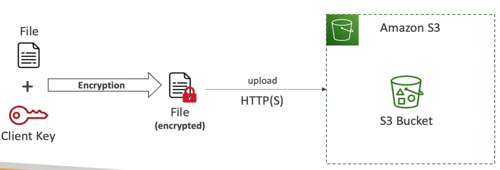

In [74]:
from PIL import Image 
from IPython.display import display

img = Image.open('clientside.jpeg')
new_image = img.resize((500, 170))
display(new_image)

### Encryption in Transit (SSL - Secure Socket Layer/TLS - Transport Layer Security):
- Amazon exposes 2 endpoints
    - HTTP endpoint (not encrypted)
    - HTTPS endpoint (encrypted in flight)
- HTTPS is recommended
- HTTPS is mandatory for SSE-C encryption

#### Force encryption in transit (aws:SecureTransport) using bucket policy:

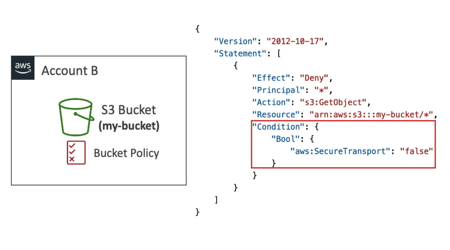

In [79]:
from PIL import Image 
from IPython.display import display

img = Image.open('force.jpeg')
new_image = img.resize((450, 250))
display(new_image)

### Default Encryption vs Bucket Policies:
- Even though, we choose the encryption type (SSE) during bucket creation
- if the bucket policy allows only (SSE-KMS) encryption then the object with SSE encryption will result in upload failure


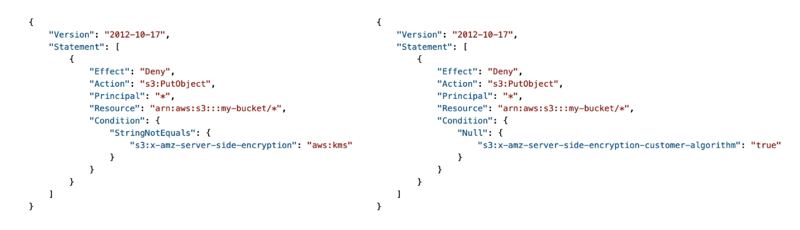

In [93]:
from PIL import Image 
from IPython.display import display

img = Image.open('bucketpolicy2.jpeg')
new_image = img.resize((800, 230))
display(new_image)

## CORS (Cross-Origin Resource Sharing) - S3 Static Website:

- Origin = scheme (protocol) + host (domain) + port
- Web browser based mechanism to allow requests to other origins while visiting the main origin
- Same origin: https://www.example.com/app1 & https://www.example.com/app2
- Different origin: https://www.example.com & https://others.example.com
- The request wont be fulfilled unless other origin grants requests using CORS header
    - Access-Control-Allow-Origin

Example: One web server requiring other web server for images in its webpage - S3 Website:

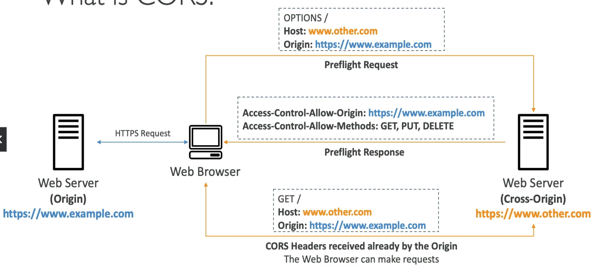

In [122]:
from PIL import Image 
from IPython.display import display

img = Image.open('CORS.jpeg')
new_image = img.resize((600, 270))
display(new_image)

#### Amazon S3 with CORS:
- If client makes cross origin request on S3 bucket, we need to enable CORS headers
- '*' for any region or for specific region (CORS headers)

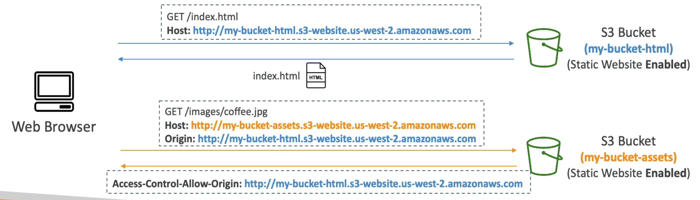

In [105]:
from PIL import Image 
from IPython.display import display

img = Image.open('CORS2.jpeg')
new_image = img.resize((700, 200))
display(new_image)

### Setup CORS Headers in S3:
- Go inside a bucket B1 in S3 console
- If we paste both the files in same bucket in a region (index.html & extra-index.html - B1)
- Then the pages will be loaded and doesn't require CORS header
- But if we paste the files in different buckets or regions (B1 & B2)
    - file (extra-index.html) uploaded to Another bucket B2 & file (index.html) uploaded to bucket B1
    - however, while enabling the static website hosting option
        - name the file as index.html
- Update the index.html file with the Object url obtained from another bucket B2
- Re-upload the index.html file in bucket B1
- Go to bucket B2 under the permission tab
    - add CORS header
        - Access-Control-Allow-Origin
            - See the policy below

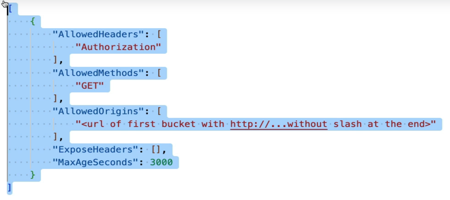

In [125]:
from PIL import Image 
from IPython.display import display

img = Image.open('CORS3.jpeg')
new_image = img.resize((450, 200))
display(new_image)

Note:
- In the above image, in place of "Allowed Origins" value, paste the URL of the first bucket

### S3 MFA Delete:
- permanently delete on object
- suspend versioning of a bucket

Note:
- To use MFA delete, we should enable versioning on bucket
- Only bucket owner can perform this operation

### Setup MFA Delete:
- Go to S3 console and create a bucket with versioning enabled
- Upload some sample files into the bucket
- Now go to properties tab in the bucket and go to bucket versioning 
    - enable MFA delete (using AWS CLI or SDK) and not via console

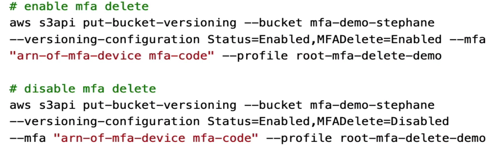

In [131]:
from PIL import Image 
from IPython.display import display

img = Image.open('MFA.jpeg')
new_image = img.resize((500, 150))
display(new_image)

### S3 Access Logs:
- For audit purpose, we want S3 access logs to log all access to S3 bucket
- all logging operation of bucket is logged into a target bucket and it must be in same AWS region

Note:
- Do not set the same bucket for logging as the monitored bucket
- This will result in logging loop and size will grow exponentially

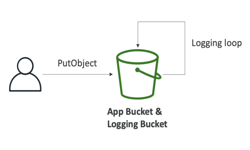

In [135]:
from PIL import Image 
from IPython.display import display

img = Image.open('accesslogs.jpeg')
new_image = img.resize((250, 150))
display(new_image)

### Setup Access Logs:
- Create a logging bucket in S3 console
- Enable access logs for the existing bucket
    - Go to properties in the existing bucket
        - server access logging
            - edit and enable (bucket policy will be updated)
                - bucket policy in the target bucket is updated
            - S3 target bucket link
            - log object key format

### S3 Pre-signed URL:
- Generate pre-signed URL using S3 console, AWS SDK, AWS CLI
- URL expiration
    - Console - 12 hours
    - AWS CLI - 168 hours
- Users given a pre-signed url will inherit the permission of the owner (who generated url for GET/PUT)

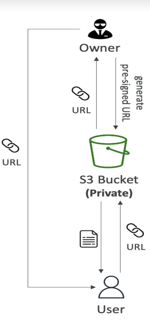

In [140]:
from PIL import Image 
from IPython.display import display

img = Image.open('presigned.jpeg')
new_image = img.resize((150, 320))
display(new_image)

### Setup S3 pre-signed URL:
- Using console:
    - select the object and click object actions option (right side)
    - share pre-signed URL
        - mins
        - hour
        - value
        - create

- Using CLI:
    - aws s3 presign s3://mybucket/myobject  --expires-in 300


### S3 Access Point:
- simplify security management for S3 buckets
- Each Access Point:
    - its own DNS name (internet origin or VPC origin)
    - access point policy (similar to bucket policy)

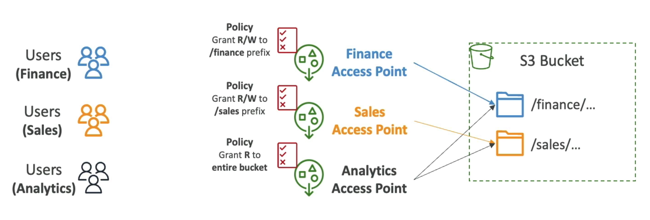

In [146]:
from PIL import Image 
from IPython.display import display

img = Image.open('accesspoint.jpeg')
new_image = img.resize((650, 220))
display(new_image)

### Access Point - VPC origin:
- Use VPC Gateway or Interface endpoint to access S3 Access Point
- VPC Endpoint policy must allow access to target buckets and Access Point

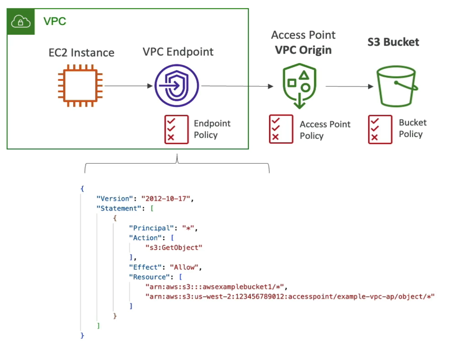

In [151]:
from PIL import Image 
from IPython.display import display

img = Image.open('vpcorigin.jpeg')
new_image = img.resize((450, 350))
display(new_image)

### S3 Object Lambda:
- AWS Lambda function used to change the object before its retrieved by the application
- Only one S3 bucket is needed, create S3 Access point, Lambda function, S3 object Lambda Access Point
- Usage:
    - Redacting personally identifiable information for analytics
    - converting data formats from XML to JSON
    - resizing and watermarking images 

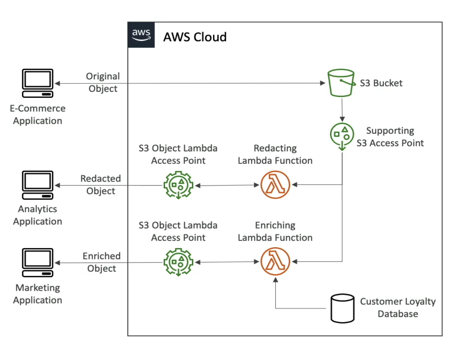

In [152]:
from PIL import Image 
from IPython.display import display

img = Image.open('objectlambda.jpeg')
new_image = img.resize((450, 350))
display(new_image)